In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
import pandas as pd

# Try specifying the encoding
dataset = pd.read_csv("spam.csv", encoding='latin-1')  # or encoding='latin1'

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
dataset.columns=['label','message']

In [7]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    10743 non-null  object
 1   message  10743 non-null  object
dtypes: object(2)
memory usage: 168.0+ KB


In [9]:
dataset.describe()

,label,message
count,10743,10743
unique,2,10162
top,ham,"Sorry, I'll call later"
freq,8497,30


In [10]:
dataset['label']=dataset['label'].map({'ham':0,'spam':1})

In [11]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,0,put the 10 on the ft\r\nthe transport volumes...
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,0,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,0,industrial worksheets for august 2000 activit...


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

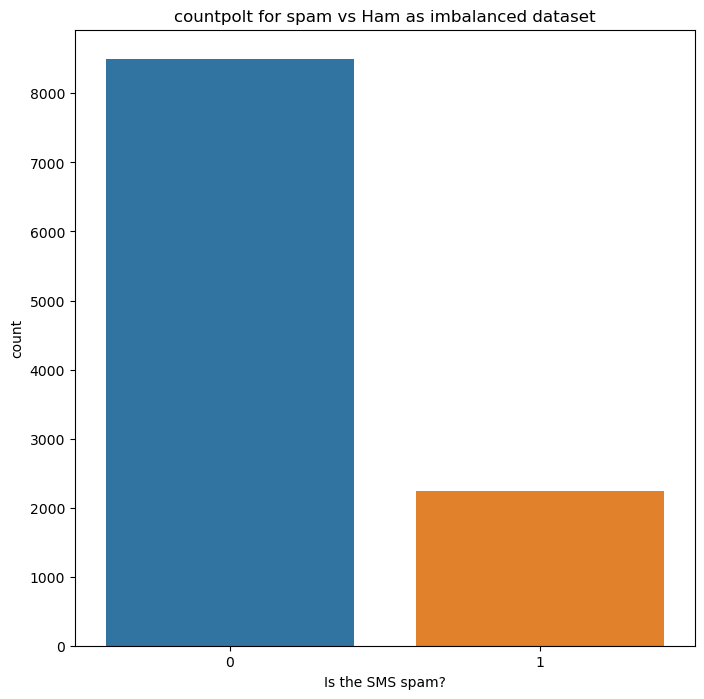

In [13]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label',data=dataset)
p = plt.title('countpolt for spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS spam?')
p = plt.ylabel('count')

In [14]:
only_spam= dataset[dataset['label']==1]

In [15]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
10731,1,pictures\r\nstreamlined denizen ajar chased\r...
10733,1,penny stocks are about timing\r\nnomad intern...
10734,1,anomaly boys from 3881\r\nuosda apaproved mle...
10736,1,slutty milf wants to meet you\r\ntake that !\...


In [16]:
print('no.of spam SMS:',len(only_spam) )
print('no.of ham SMS:', len(dataset) - len(only_spam))

no.of spam SMS: 2246
no.of ham SMS: 8497


In [17]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [18]:
count

3

In [19]:
for i in range (0,count-1):
    dataset = pd.concat([dataset,only_spam])
dataset.shape

(15235, 2)

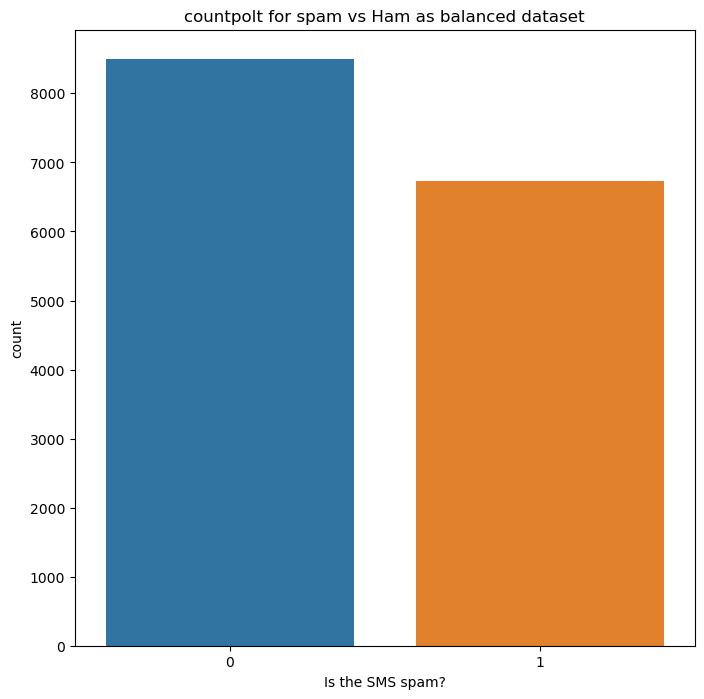

In [20]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label',data=dataset)
p = plt.title('countpolt for spam vs Ham as balanced dataset')
p = plt.xlabel('Is the SMS spam?')
p = plt.ylabel('count')

creting new feature word count

In [22]:
dataset['word_count'] =dataset['message'].apply(lambda x: len(x.split()))

In [23]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
10731,1,pictures\r\nstreamlined denizen ajar chased\r...,66
10733,1,penny stocks are about timing\r\nnomad intern...,764
10734,1,anomaly boys from 3881\r\nuosda apaproved mle...,59
10736,1,slutty milf wants to meet you\r\ntake that !\...,13


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


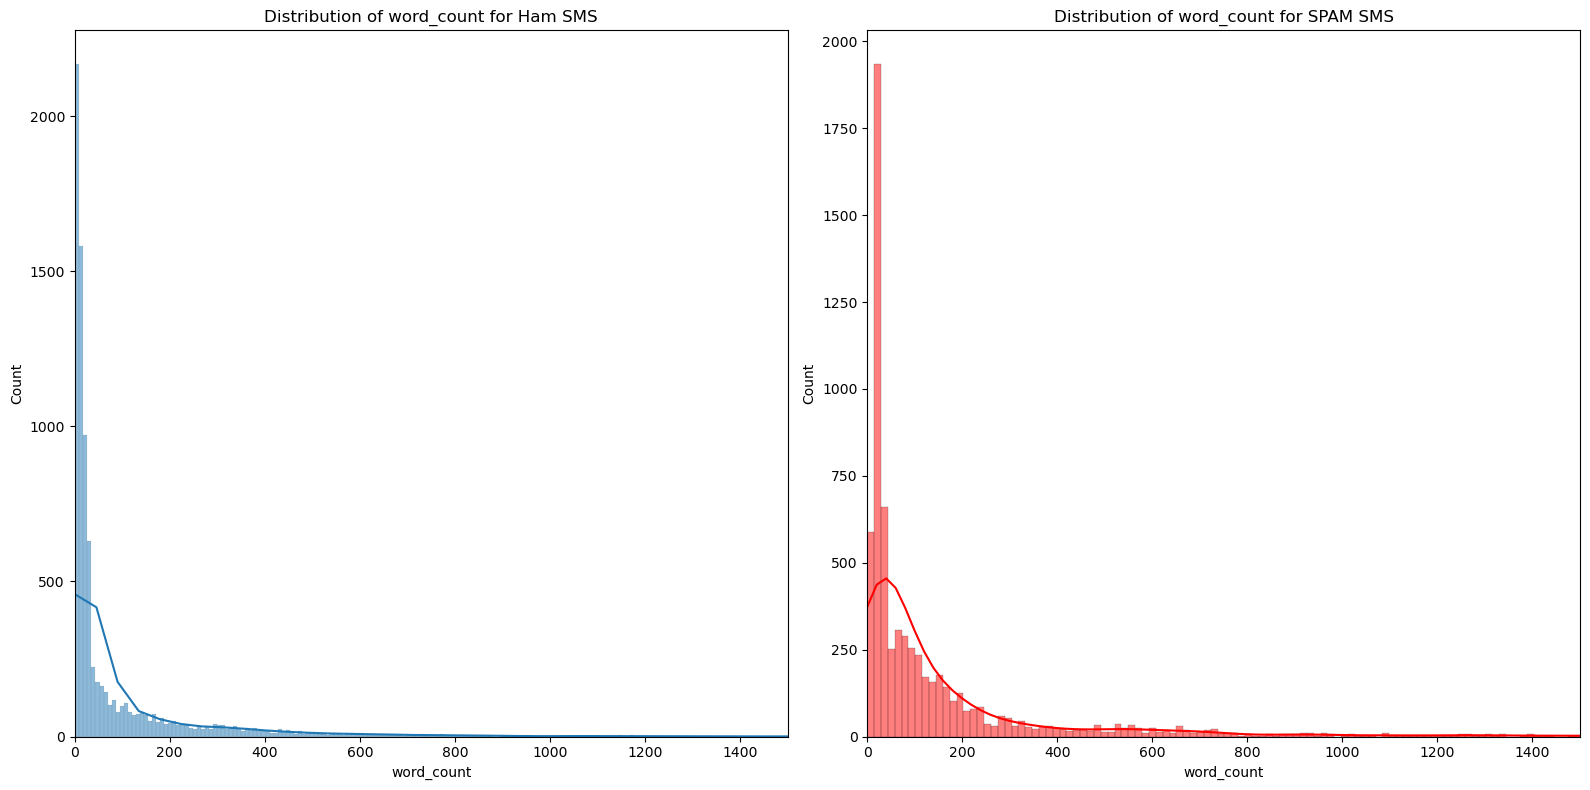

In [24]:
plt.figure(figsize=(16,8))  # Increasing the figure size for a wider plot

plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset['label'] == 0].word_count, kde=True)
p = plt.title('Distribution of word_count for Ham SMS')
plt.xlim([0, 1500])  # Adjusting the x-axis limit to elongate

plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset['label'] == 1].word_count, color='red', kde=True)
p = plt.title('Distribution of word_count for SPAM SMS')
plt.xlim([0, 1500])  # Adjusting the x-axis limit to elongate

plt.tight_layout()
plt.show()



In [25]:
import re

# Define a function to detect currency symbols
def currency_symbols(text):
    # Regular expression for common currency symbols
    currency_regex = r"[\$\€\£\¥\₹]"
    if re.search(currency_regex, text):
        return 1
    else:
        return 0

# Apply the function to the 'message' column
dataset["contains_currency_symbols"] = dataset['message'].apply(currency_symbols)

# Display the updated dataset
dataset


,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
10731,1,pictures\r\nstreamlined denizen ajar chased\r...,66,0
10733,1,penny stocks are about timing\r\nnomad intern...,764,0
10734,1,anomaly boys from 3881\r\nuosda apaproved mle...,59,0
10736,1,slutty milf wants to meet you\r\ntake that !\...,13,0


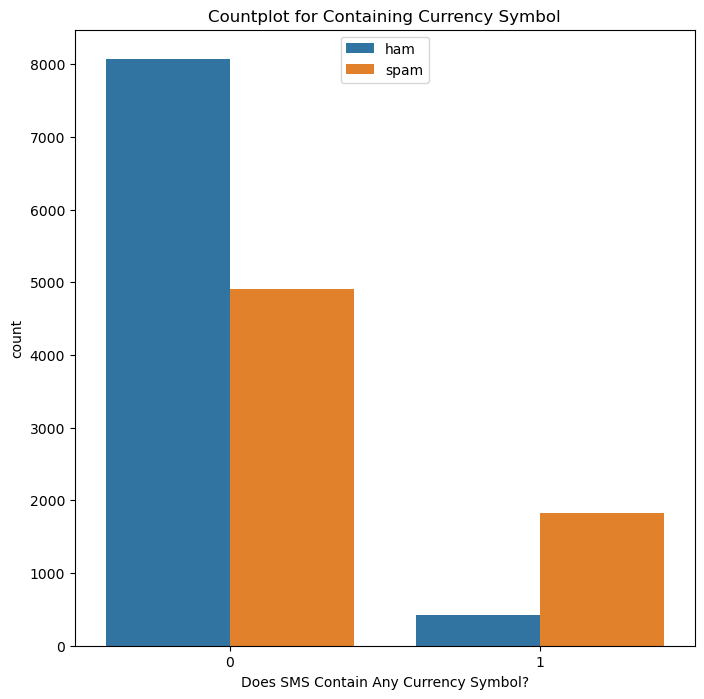

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['label'] = dataset['label'].astype(str)
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbols', data=dataset, hue='label')
plt.title('Countplot for Containing Currency Symbol')
plt.xlabel('Does SMS Contain Any Currency Symbol?')
p = plt.legend(labels=["ham","spam"], loc = 9)

# Show the plot
plt.show()


In [27]:
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:  # Correct usage of ord()
            return 1
    return 0


In [28]:
dataset["contains_number"] =dataset['message'].apply(number)

In [29]:
dataset

,label,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
10731,1,pictures\r\nstreamlined denizen ajar chased\r...,66,0,1
10733,1,penny stocks are about timing\r\nnomad intern...,764,0,1
10734,1,anomaly boys from 3881\r\nuosda apaproved mle...,59,0,1
10736,1,slutty milf wants to meet you\r\ntake that !\...,13,0,0


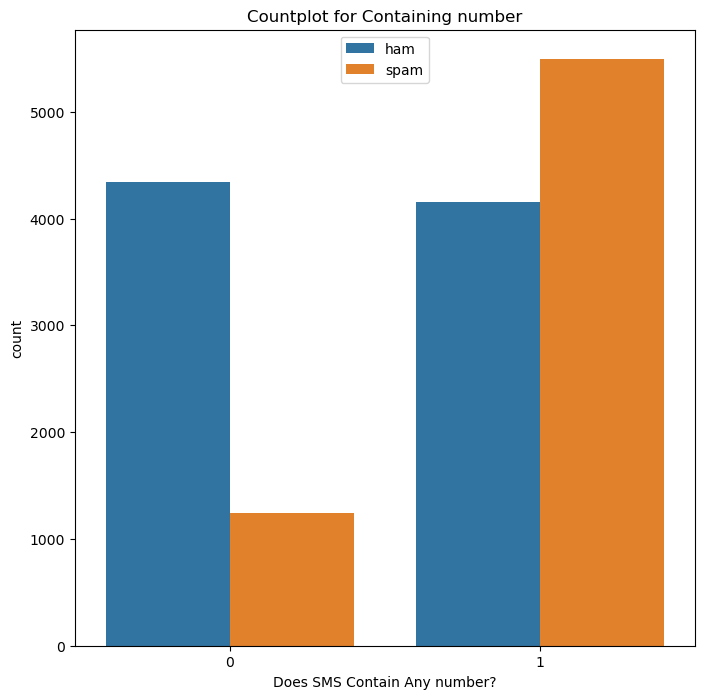

In [30]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=dataset, hue='label')
p = plt.title('Countplot for Containing number')
p = plt.xlabel('Does SMS Contain Any number?')
p = plt.ylabel('count')
p = plt.legend(labels=["ham","spam"], loc = 9)

#cleaning the data

In [32]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

wn1 = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

corpus = []

for sms in list(dataset.message):

    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)
    message = message.lower()
    message = message.split()
    filtered_words = [word for word in message if word not in stop_words]
    lemm_words = [wn1.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    corpus.append(message)


In [34]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()


In [36]:
x = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=42)

In [39]:
x_train

,able,access,account,act,action,activity,actual,actuals,add,additional,...,without,word,work,world,would,www,xl,xp,year,young
5985,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2487,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8262,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4462,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5099,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
13418,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5390,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
860,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.521269,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [40]:
import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)
print(mnb)
print(round(cv.mean(), 3))
print(round(cv.std(),3))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    

MultinomialNB()
nan
nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    

In [41]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1734
           1       0.84      0.91      0.87      1313

    accuracy                           0.88      3047
   macro avg       0.88      0.89      0.88      3047
weighted avg       0.89      0.88      0.88      3047



In [43]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1498,  236],
       [ 116, 1197]], dtype=int64)

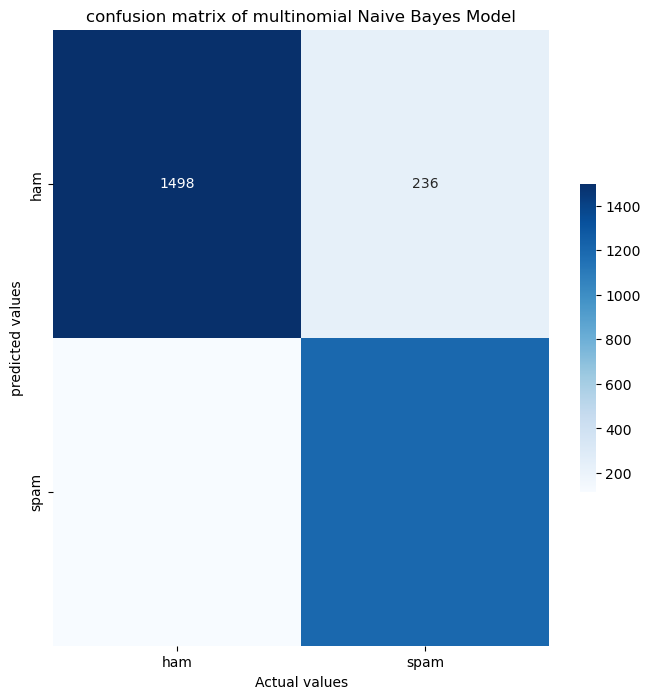

In [44]:
plt.figure(figsize=(8,8))
axis_labels =['ham','spam']
g = sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels, annot = True, fmt='g' ,cbar_kws= {"shrink":0.5},cmap="Blues")
p = plt.title("confusion matrix of multinomial Naive Bayes Model")
p = plt.xlabel('Actual values')
p = plt.ylabel('predicted values')

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, x, y, scoring='f1_weighted', cv=10)  
print(round(cv.mean(), 3))
print(round(cv.std(), 3))


nan
nan


In [46]:
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1734
           1       0.94      0.96      0.95      1313

    accuracy                           0.95      3047
   macro avg       0.95      0.95      0.95      3047
weighted avg       0.95      0.95      0.95      3047



In [48]:
cm = confusion_matrix(y_test,y_pred1)
cm

array([[1650,   84],
       [  57, 1256]], dtype=int64)

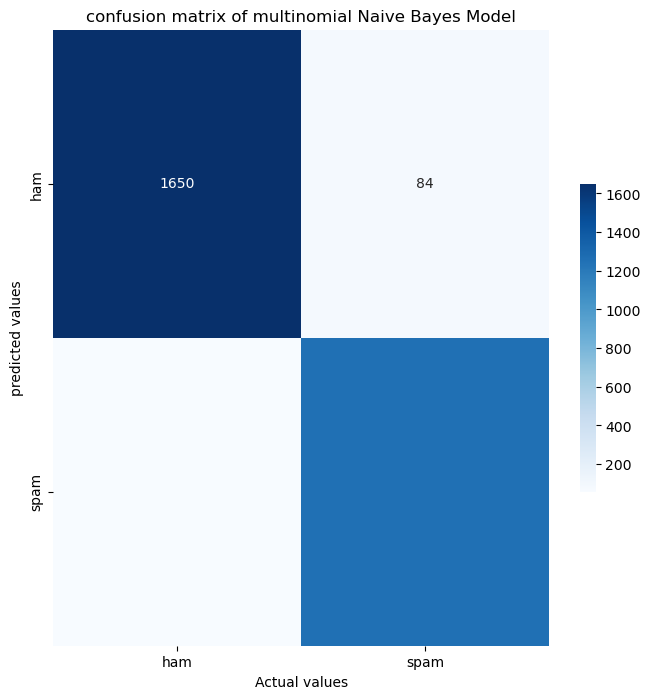

In [49]:
plt.figure(figsize=(8,8))
axis_labels =['ham','spam']
g = sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels, annot = True, fmt='g' ,cbar_kws= {"shrink":0.5},cmap="Blues")
p = plt.title("confusion matrix of multinomial Naive Bayes Model")
p = plt.xlabel('Actual values')
p = plt.ylabel('predicted values')

In [50]:
def predict_spam(sms):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in message if word not in stop_words]
    lemm_words = [wn1.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray()
    return dt.predict(temp)


In [51]:
# Example function for predicting spam
def predict_spam(message):
    return True  
sample_message = 'IMPORTANT-you could be entitled upto £3,160 in compensation from mis-sold PPI on a credit card or loan. please reply PPI for info or stop to opt out.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (Normal) message.')


Gotcha! This is a SPAM message.
